In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
problem_statement = "predict acident survive chance"
success_metric = "accuracy"

In [23]:
df = pd.read_csv("/content/accident.csv")

In [24]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [26]:
df.isnull().sum()

,0
Age,0
Gender,1
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [27]:
df_nonull = df.dropna()
df_nonull

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


In [28]:
df_nonull.describe()

,Age,Speed_of_Impact,Survived
count,196.000000,196.000000,196.000000
mean,43.341837,70.433673,0.510204
std,15.004973,30.202236,0.501176
min,18.000000,20.000000,0.000000
25%,31.000000,43.000000,0.000000
50%,44.000000,71.000000,1.000000
75%,56.000000,95.500000,1.000000
max,69.000000,119.000000,1.000000


In [29]:
df_nonull.shape

(196, 6)

In [30]:
df_nonull.loc[:, 'Helmet_Used'] = df_nonull['Helmet_Used'].map({'Yes': 1, 'No': 0})
df_nonull.loc[:, 'Seatbelt_Used'] = df_nonull['Seatbelt_Used'].map({'Yes': 1, 'No': 0})
df_nonull.loc[:, 'Gender'] = df_nonull['Gender'].map({'Male': 1, 'Female': 0})

df_nonull

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0,27.0,0,0,1
1,69,0,46.0,0,1,1
2,46,1,46.0,1,1,0
3,32,1,117.0,0,1,0
4,60,0,40.0,1,1,0
...,...,...,...,...,...,...
195,69,0,111.0,0,1,1
196,30,0,51.0,0,1,1
197,58,1,110.0,0,1,1
198,20,1,103.0,0,1,1


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_nonull.loc[:,'Speed_of_Impact'] = scaler.fit_transform(df_nonull[['Speed_of_Impact']])


In [39]:
df_nonull

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0,-1.441777,0,0,1
1,69,0,-0.811074,0,1,1
2,46,1,-0.811074,1,1,0
3,32,1,1.545766,0,1,0
4,60,0,-1.010243,1,1,0
...,...,...,...,...,...,...
195,69,0,1.346596,0,1,1
196,30,0,-0.645099,0,1,1
197,58,1,1.313401,0,1,1
198,20,1,1.081037,0,1,1


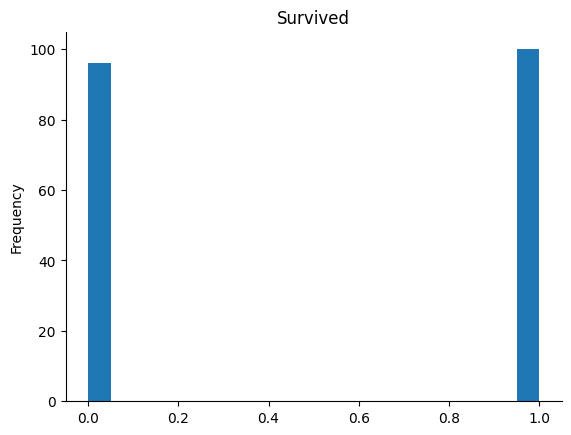

In [40]:
from matplotlib import pyplot as plt
df_nonull['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [50]:
from sklearn.model_selection import train_test_split

X = df_nonull.drop('Survived', axis=1)
y = df_nonull['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("training set size: ",x_train.shape)
print("testing set size: ",x_test.shape)

training set size:  (156, 5)
testing set size:  (40, 5)


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression()
model.fit(x_train, y_train) # Changed X_train to x_train to match the variable defined earlier

LogisticRegression()

In [60]:
y_pred = model.predict(x_test)


In [61]:
# Accuracy Score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.575
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.48      0.59        25
           1       0.46      0.73      0.56        15

    accuracy                           0.57        40
   macro avg       0.60      0.61      0.57        40
weighted avg       0.64      0.57      0.58        40

Confusion Matrix:
 [[12 13]
 [ 4 11]]


In [48]:
print(df['Survived'].value_counts())


Survived
1    101
0     99
Name: count, dtype: int64


In [58]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(x_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [62]:
df_nonull


,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0,-1.441777,0,0,1
1,69,0,-0.811074,0,1,1
2,46,1,-0.811074,1,1,0
3,32,1,1.545766,0,1,0
4,60,0,-1.010243,1,1,0
...,...,...,...,...,...,...
195,69,0,1.346596,0,1,1
196,30,0,-0.645099,0,1,1
197,58,1,1.313401,0,1,1
198,20,1,1.081037,0,1,1
